## HMM tarining in both a supervised and unsupervised manner

> The provided dataset does not contain a set of sequences, it only contains a list of consecutive days. Thus, a sliding windows is defined with a size of 10 to make sequences of size 10, and continue the calculations. 

In [144]:
%load_ext autoreload
%autoreload 2

import numpy as np
from HMM import hmm
import os

source_dir = "Dataset/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
# Read and reform the dataset
file_read = open(source_dir+[item for item in os.listdir(source_dir) if ".txt" in item][0], "r+")
lines = file_read.readlines()[1:]
fix_data = lambda line: line.strip().replace('\n', "").split(",")
dataset = np.array(list(map(fix_data, lines)), dtype=object)

In [146]:
supervised_model = hmm()
supervised_model.supervised_training(dataset[:, 1], dataset[:, 0])

In [147]:
print(supervised_model)

,foggy,rainy,sunny
foggy,0.430666,0.276498,0.193129
rainy,0.187628,0.545678,0.165916
sunny,0.130264,0.040732,0.729240


,no,yes
foggy,0.749057,0.250943
rainy,0.220401,0.779599
sunny,0.897678,0.102322


100%|██████████| 30/30 [00:21<00:00,  1.39it/s]


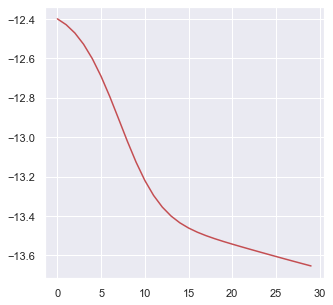

In [158]:
unsupervised_model = hmm()
unsupervised_model.unsupervised_training(dataset[:, 1], states, iterations=30)

In [159]:
print(unsupervised_model)

,foggy,rainy,sunny
foggy,0.106048,0.285935,0.608017
rainy,0.035858,0.785561,0.178581
sunny,0.239576,0.077481,0.682944


,no,yes
foggy,0.754531,0.245469
rainy,0.372646,0.627354
sunny,0.924702,0.075298


#### Let's test some sequences

In [160]:
seqences = [["yes"], 
            ["no"], 
            ['yes', 'yes'], 
            ['no', "yes"], 
            ["yes", "no"], 
            ["yes", "yes", "no"], 
            ["yes", "yes", "no", "yes"], 
            ["no", "no", "yes", "no"], 
            ["no", "no", "no", "yes", "no", "no", "yes", "yes", "no", "yes"]]

for seq in seqences:
    print(seq)
    print(f"The decoded sequence: {supervised_model.viterbi(seq)}")
    print(f"Likelihood: {supervised_model.likelihood(seq)[0]:.3}\n")

['yes']
The decoded sequence: ['rainy']
Likelihood: 0.378

['no']
The decoded sequence: ['sunny']
Likelihood: 0.622

['yes', 'yes']
The decoded sequence: ['rainy', 'rainy']
Likelihood: 0.161

['no', 'yes']
The decoded sequence: ['foggy', 'rainy']
Likelihood: 0.163

['yes', 'no']
The decoded sequence: ['rainy', 'sunny']
Likelihood: 0.179

['yes', 'yes', 'no']
The decoded sequence: ['rainy', 'rainy', 'sunny']
Likelihood: 0.0722

['yes', 'yes', 'no', 'yes']
The decoded sequence: ['rainy', 'rainy', 'rainy', 'rainy']
Likelihood: 0.0214

['no', 'no', 'yes', 'no']
The decoded sequence: ['sunny', 'sunny', 'sunny', 'sunny']
Likelihood: 0.0474

['no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes']
The decoded sequence: ['sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'foggy', 'rainy', 'rainy', 'rainy', 'rainy']
Likelihood: 0.000206



In [161]:
for seq in seqences:
    print(seq)
    print(f"The decoded sequence: {unsupervised_model.viterbi(seq)}")
    print(f"Likelihood: {unsupervised_model.likelihood(seq)[0]:.3}\n")

['yes']
The decoded sequence: ['rainy']
Likelihood: 0.316

['no']
The decoded sequence: ['sunny']
Likelihood: 0.684

['yes', 'yes']
The decoded sequence: ['rainy', 'rainy']
Likelihood: 0.132

['no', 'yes']
The decoded sequence: ['rainy', 'rainy']
Likelihood: 0.176

['yes', 'no']
The decoded sequence: ['rainy', 'rainy']
Likelihood: 0.184

['yes', 'yes', 'no']
The decoded sequence: ['rainy', 'rainy', 'rainy']
Likelihood: 0.0684

['yes', 'yes', 'no', 'yes']
The decoded sequence: ['rainy', 'rainy', 'rainy', 'rainy']
Likelihood: 0.024

['no', 'no', 'yes', 'no']
The decoded sequence: ['sunny', 'sunny', 'foggy', 'sunny']
Likelihood: 0.0695

['no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes']
The decoded sequence: ['sunny', 'sunny', 'foggy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy']
Likelihood: 0.000629



In [164]:
import pickle as pk
if "save" not in os.listdir():
    os.mkdir("save")
fh = open("save/saved_unsupervised.pk", "wb")
pk.dump(unsupervised_model, fh) 
fh.close()

fh_1 = open("save/saved_supervised.pk", "wb")
pk.dump(supervised_model, fh_1)
fh_1.close()